
Average delivery vs expected per city:
            delivery_time  expected_time  avg_delay
city                                              
Bangalore         47.750         38.125      9.625
Delhi             42.000         34.500      7.500
Hyderabad         48.500         38.125     10.375
Kolkata           54.375         41.875     12.500
Mumbai            47.625         38.750      8.875
Pune              46.000         38.125      7.875

Cuisine delays:
               total_orders  avg_delay
cuisine                              
Mughlai                  6  13.500000
Biryani                  7  11.142857
North Indian             8  10.375000
Chinese                  9  10.000000
Pizza                    8   7.125000
Burger                   5   7.000000
South Indian             7   6.428571

Peak hours:
            orders  avg_delay
time_slot                   
Dinner         20  12.250000
Lunch          16   7.937500
Other          14   6.928571

Top 5 customers by spending:
 c

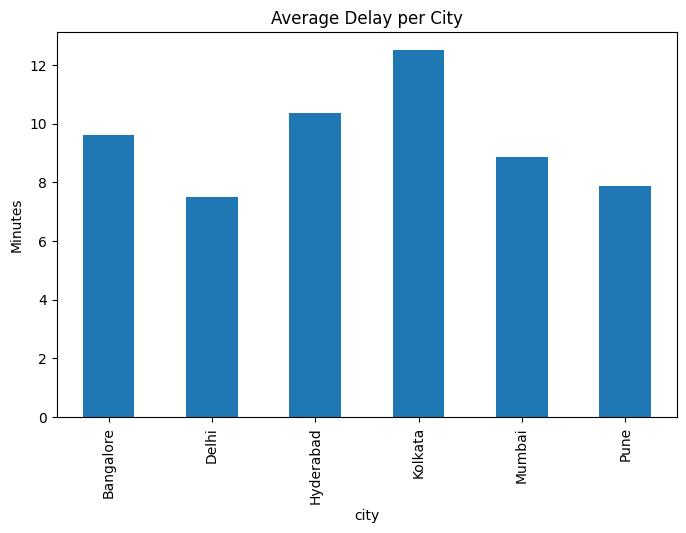

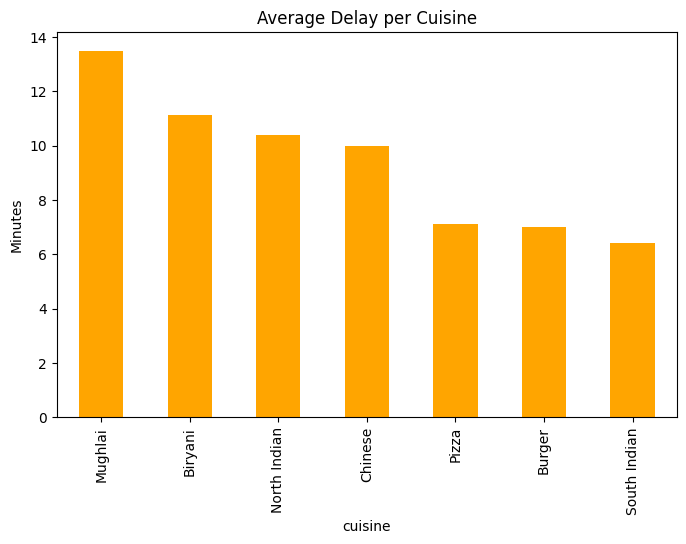

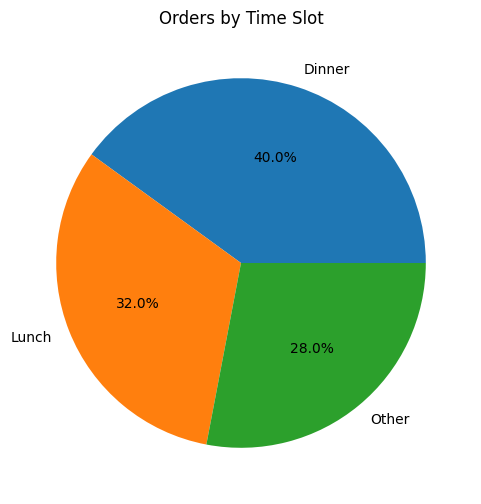

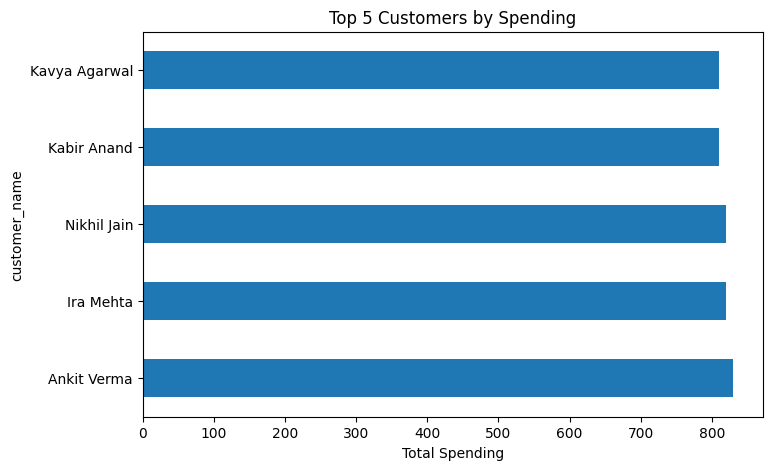

In [2]:
# Zomato Delivery Analytics (Python)
# Matches zomato_analysis.sql dataset

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create dataset (same as SQL inserts)
data = [
    (1, 101, 'Amit Sharma', 'Delhi', 'North Indian', '2025-09-01 12:10:00', 42, 35, 450),
    (2, 102, 'Priya Singh', 'Mumbai', 'Chinese', '2025-09-01 19:20:00', 50, 40, 600),
    (3, 103, 'Rahul Verma', 'Bangalore', 'Pizza', '2025-09-01 13:05:00', 38, 30, 350),
    (4, 104, 'Neha Gupta', 'Hyderabad', 'Biryani', '2025-09-01 20:15:00', 55, 45, 700),
    (5, 105, 'Arjun Mehta', 'Delhi', 'South Indian', '2025-09-02 08:30:00', 30, 25, 300),
    (6, 106, 'Sanya Kapoor', 'Pune', 'Burger', '2025-09-02 14:45:00', 40, 35, 250),
    (7, 107, 'Rohit Yadav', 'Kolkata', 'Mughlai', '2025-09-02 21:00:00', 65, 50, 800),
    (8, 108, 'Ananya Roy', 'Delhi', 'Pizza', '2025-09-02 18:10:00', 36, 30, 400),
    (9, 109, 'Karan Joshi', 'Mumbai', 'Chinese', '2025-09-03 12:20:00', 48, 40, 550),
    (10, 110, 'Simran Kaur', 'Bangalore', 'North Indian', '2025-09-03 13:40:00', 41, 35, 500),
    (11, 111, 'Varun Malhotra', 'Hyderabad', 'Biryani', '2025-09-03 19:30:00', 60, 45, 720),
    (12, 112, 'Isha Reddy', 'Pune', 'South Indian', '2025-09-04 09:15:00', 28, 25, 280),
    (13, 113, 'Nikhil Jain', 'Kolkata', 'Mughlai', '2025-09-04 20:25:00', 62, 50, 820),
    (14, 114, 'Sneha Patel', 'Delhi', 'Burger', '2025-09-04 15:40:00', 39, 35, 270),
    (15, 115, 'Aarav Nair', 'Mumbai', 'Pizza', '2025-09-05 18:50:00', 37, 30, 420),
    (16, 116, 'Tanya Sharma', 'Bangalore', 'Chinese', '2025-09-05 12:55:00', 49, 40, 580),
    (17, 117, 'Devansh Kapoor', 'Hyderabad', 'North Indian', '2025-09-05 20:45:00', 54, 45, 650),
    (18, 118, 'Riya Ghosh', 'Pune', 'Biryani', '2025-09-06 13:25:00', 58, 50, 730),
    (19, 119, 'Abhishek Rao', 'Kolkata', 'Chinese', '2025-09-06 19:10:00', 51, 40, 600),
    (20, 120, 'Pooja Das', 'Delhi', 'South Indian', '2025-09-06 08:45:00', 32, 25, 310),
    (21, 121, 'Manish Singh', 'Mumbai', 'Pizza', '2025-09-07 13:15:00', 35, 30, 390),
    (22, 122, 'Kavya Agarwal', 'Bangalore', 'Mughlai', '2025-09-07 21:30:00', 64, 50, 810),
    (23, 123, 'Siddharth Menon', 'Hyderabad', 'Chinese', '2025-09-07 19:20:00', 53, 40, 610),
    (24, 124, 'Meera Pillai', 'Pune', 'Biryani', '2025-09-08 14:05:00', 59, 50, 750),
    (25, 125, 'Aditya Khanna', 'Kolkata', 'North Indian', '2025-09-08 20:40:00', 57, 45, 680),
    (26, 126, 'Shreya Roy', 'Delhi', 'Chinese', '2025-09-09 12:30:00', 47, 40, 590),
    (27, 127, 'Rajeev Kumar', 'Mumbai', 'Burger', '2025-09-09 18:25:00', 44, 35, 260),
    (28, 128, 'Alok Pandey', 'Bangalore', 'South Indian', '2025-09-09 09:50:00', 31, 25, 295),
    (29, 129, 'Nisha Sharma', 'Hyderabad', 'Pizza', '2025-09-10 13:45:00', 39, 30, 410),
    (30, 130, 'Vivek Jain', 'Pune', 'Chinese', '2025-09-10 19:10:00', 52, 40, 605),
    (31, 131, 'Rachna Gupta', 'Kolkata', 'North Indian', '2025-09-10 21:35:00', 61, 45, 720),
    (32, 132, 'Ankit Verma', 'Delhi', 'Mughlai', '2025-09-11 12:40:00', 63, 50, 830),
    (33, 133, 'Ayesha Khan', 'Mumbai', 'Biryani', '2025-09-11 20:15:00', 56, 45, 700),
    (34, 134, 'Harshit Gupta', 'Bangalore', 'Pizza', '2025-09-11 18:50:00', 36, 30, 360),
    (35, 135, 'Pallavi Sinha', 'Hyderabad', 'South Indian', '2025-09-12 09:20:00', 33, 25, 310),
    (36, 136, 'Aman Kumar', 'Pune', 'North Indian', '2025-09-12 13:05:00', 43, 35, 480),
    (37, 137, 'Sonia Das', 'Kolkata', 'Burger', '2025-09-12 19:25:00', 45, 35, 280),
    (38, 138, 'Rohini Nair', 'Delhi', 'Biryani', '2025-09-13 20:30:00', 57, 45, 710),
    (39, 139, 'Parth Shah', 'Mumbai', 'Chinese', '2025-09-13 12:55:00', 49, 40, 590),
    (40, 140, 'Ira Mehta', 'Bangalore', 'Mughlai', '2025-09-13 21:00:00', 65, 50, 820),
    (41, 141, 'Dhruv Kapoor', 'Hyderabad', 'North Indian', '2025-09-14 19:15:00', 55, 45, 640),
    (42, 142, 'Ritika Sen', 'Pune', 'Pizza', '2025-09-14 13:20:00', 37, 30, 390),
    (43, 143, 'Arnav Mishra', 'Kolkata', 'South Indian', '2025-09-14 09:10:00', 34, 25, 320),
    (44, 144, 'Muskan Bansal', 'Delhi', 'Burger', '2025-09-14 15:30:00', 42, 35, 275),
    (45, 145, 'Kabir Anand', 'Mumbai', 'Mughlai', '2025-09-15 20:40:00', 62, 50, 810),
    (46, 146, 'Lavanya Joshi', 'Bangalore', 'Biryani', '2025-09-15 18:25:00', 58, 45, 730),
    (47, 147, 'Rohan Desai', 'Hyderabad', 'Pizza', '2025-09-15 13:50:00', 39, 30, 420),
    (48, 148, 'Sakshi Malhotra', 'Pune', 'Chinese', '2025-09-16 19:05:00', 51, 40, 600),
    (49, 149, 'Arpit Singh', 'Kolkata', 'North Indian', '2025-09-16 21:30:00', 60, 45, 690),
    (50, 150, 'Divya Reddy', 'Delhi', 'South Indian', '2025-09-16 08:40:00', 32, 25, 305),
]

columns = ["order_id", "customer_id", "customer_name", "city", "cuisine", "order_time", "delivery_time", "expected_time", "price"]
df = pd.DataFrame(data, columns=columns)

# Convert order_time to datetime
df["order_time"] = pd.to_datetime(df["order_time"])

# Step 2: Analysis (same as SQL)

# 1. Average delivery vs expected time per city
city_analysis = df.groupby("city")[["delivery_time", "expected_time"]].mean()
city_analysis["avg_delay"] = city_analysis["delivery_time"] - city_analysis["expected_time"]
print("\nAverage delivery vs expected per city:\n", city_analysis)

# 2. Which cuisines face most delays
cuisine_analysis = df.groupby("cuisine").agg(
    total_orders=("order_id", "count"),
    avg_delay=("delivery_time", lambda x: (x - df.loc[x.index, "expected_time"]).mean())
).sort_values("avg_delay", ascending=False)
print("\nCuisine delays:\n", cuisine_analysis)

# 3. Peak hours (Lunch vs Dinner vs Other)
def time_slot(hour):
    if 12 <= hour <= 14:
        return "Lunch"
    elif 19 <= hour <= 22:
        return "Dinner"
    else:
        return "Other"

df["time_slot"] = df["order_time"].dt.hour.apply(time_slot)
time_slot_analysis = df.groupby("time_slot").agg(
    orders=("order_id", "count"),
    avg_delay=("delivery_time", lambda x: (x - df.loc[x.index, "expected_time"]).mean())
)
print("\nPeak hours:\n", time_slot_analysis)

# 4. Top 5 customers by spending
top_customers = df.groupby("customer_name")["price"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 customers by spending:\n", top_customers)

# 5. Orders delayed more than 10 minutes
delayed_orders = df[df["delivery_time"] - df["expected_time"] > 10]
print("\nOrders delayed > 10 mins:\n", delayed_orders[["order_id", "customer_name", "city", "cuisine", "delivery_time", "expected_time"]])

# Step 3: Visualization

# City-wise average delay
city_analysis["avg_delay"].plot(kind="bar", figsize=(8,5), title="Average Delay per City")
plt.ylabel("Minutes")
plt.show()

# Cuisine-wise average delay
cuisine_analysis["avg_delay"].plot(kind="bar", color="orange", figsize=(8,5), title="Average Delay per Cuisine")
plt.ylabel("Minutes")
plt.show()

# Orders per time slot
time_slot_analysis["orders"].plot(kind="pie", autopct="%.1f%%", figsize=(6,6), title="Orders by Time Slot")
plt.ylabel("")
plt.show()

# Top customers spending
top_customers.plot(kind="barh", figsize=(8,5), title="Top 5 Customers by Spending")
plt.xlabel("Total Spending")
plt.show()